<a href="https://colab.research.google.com/github/TasnimJumara/MotherandBabyCare/blob/master/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.datasets as data
import cv2


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
import pandas as pd

In [ ]:
dataset1=pd.read_csv(r'/content/sample_data/training-a.csv')

In [ ]:
dataset1.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
dataset1.drop('original filename',axis=1,inplace=True)

In [ ]:
dataset1.head()

,filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
dataset1.drop('scanid',axis=1,inplace=True)
dataset1.drop('database name original',axis=1,inplace=True)

In [ ]:
dataset1.head()

,filename,digit,contributing team,database name
0,a00000.png,5,Buet_Broncos,training-a
1,a00001.png,3,Buet_Broncos,training-a
2,a00002.png,1,Buet_Broncos,training-a
3,a00003.png,7,Buet_Broncos,training-a
4,a00004.png,0,Buet_Broncos,training-a


In [ ]:
dataset1.drop('contributing team',axis=1,inplace=True)
dataset1.drop('database name',axis=1,inplace=True)
dataset1.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
import os
from skimage import io

In [ ]:
dataset1

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
...,...,...
19697,a19697.png,4
19698,a19698.png,3
19699,a19699.png,8
19700,a19700.png,3


In [ ]:
dataset1.to_csv('updated_dataset.csv',index=False)

In [ ]:
ls

sample_data/  updated_dataset.csv


In [ ]:
class DigitFindingDataset(Dataset):
  def _init_(self,csv_file,root_dir,tranform=None,target_transform=None):
    self.annotations=pd.read_csv(csv_file)
    self.root_dir=root_dir
    self.transform=transform

In [ ]:
def _len_(self):
  return len(self.annotations)

In [ ]:
def _getitem_(self,index):
  img_path=os.path.join(self.root_dir,self.annotations.iloc[index,0])
  image=io.imread(img_path)
  y_label=torch.tensor(int(self.annotations.iloc[index,1]))

  if self.transform:
    image=self.tranform(image)

  return (image, y_label)

In [ ]:
batch_size=20
num_iteration=20000
input_dimension=28*28
num_hiddennodes=100
output_dimension=10
learning_rate=.01
hidden_layers=6
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hiddennodes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, num_hiddennodes)
        self.sigmoid_1 = nn.Sigmoid()

        #self.linear_2 = nn.Linear(num_hiddennodes, num_hiddennodes)
        #self.sigmoid_2 = nn.Sigmoid()
  
        #self.linear_3 = nn.Linear(num_hiddennodes, num_hiddennodes)
        #self.relu_1 = nn.ReLU()

        #self.linear_4 = nn.Linear(num_hiddennodes,num_hiddennodes)
        #self.relu_2 = nn.ReLU()

        self.linear_5 = nn.Linear(num_hiddennodes,num_hiddennodes)
        self.sigmoid_3 = nn.Sigmoid()

        self.linear_6 = nn.Linear(num_hiddennodes,num_hiddennodes)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(num_hiddennodes, num_classes)

    def forward(self, x):
       
        out = self.linear_1(x)
        out = self.sigmoid_1(out)
        
        #out  = self.linear_2(out)
        #out = self.sigmoid_2(out)

        #out  = self.linear_3(out)
        #out = self.relu_1(out)

        #out  = self.linear_4(out)
        #out = self.relu_2(out)

        out  = self.linear_5(out)
        out = self.sigmoid_3(out)

        out  = self.linear_6(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dimension,
                               num_classes = output_dimension,
                               num_hiddennodes = num_hiddennodes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)


                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.30454421043396. Accuracy: 11.35
Iteration: 1000. Loss: 2.326892375946045. Accuracy: 11.35
Iteration: 1500. Loss: 2.3112034797668457. Accuracy: 11.35
Iteration: 2000. Loss: 2.3055224418640137. Accuracy: 10.32
Iteration: 2500. Loss: 2.320997476577759. Accuracy: 11.35
Iteration: 3000. Loss: 2.2961606979370117. Accuracy: 11.35
Iteration: 3500. Loss: 2.3073580265045166. Accuracy: 11.83
Iteration: 4000. Loss: 2.2373480796813965. Accuracy: 11.35
Iteration: 4500. Loss: 2.312793254852295. Accuracy: 11.35
Iteration: 5000. Loss: 2.3141398429870605. Accuracy: 11.35
Iteration: 5500. Loss: 2.293206214904785. Accuracy: 11.43
Iteration: 6000. Loss: 2.2824501991271973. Accuracy: 11.35
Iteration: 6500. Loss: 2.2956058979034424. Accuracy: 28.94
Iteration: 7000. Loss: 2.281963348388672. Accuracy: 24.56
Iteration: 7500. Loss: 2.1913998126983643. Accuracy: 21.37
Iteration: 8000. Loss: 2.2283377647399902. Accuracy: 21.15
Iteration: 8500. Loss: 2.105445146560669. Accuracy: 26.0
Iterati

[2.30454421043396, 2.326892375946045, 2.3112034797668457, 2.3055224418640137, 2.320997476577759, 2.2961606979370117, 2.3073580265045166, 2.2373480796813965, 2.312793254852295, 2.3141398429870605, 2.293206214904785, 2.2824501991271973, 2.2956058979034424, 2.281963348388672, 2.1913998126983643, 2.2283377647399902, 2.105445146560669, 1.5799896717071533, 1.7231128215789795, 1.8492177724838257, 1.7135322093963623, 1.5627942085266113, 1.4353876113891602, 1.3524361848831177, 1.5099273920059204, 1.0047448873519897, 1.2537548542022705, 1.0527379512786865, 1.2321687936782837, 1.1106774806976318, 1.2671490907669067, 0.8563247919082642, 0.5347882509231567, 0.5412349104881287, 0.4367259442806244, 0.6550883650779724]


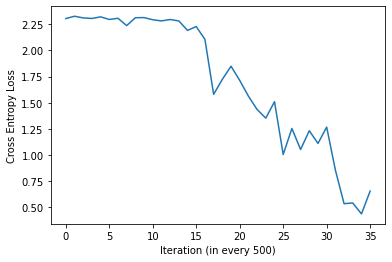

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()